In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import re as re
import warnings
#import wordcloud
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#from google.colab import files
#uploaded = files.upload()

Saving data_final.xlsx to data_final.xlsx


In [23]:
df=pd.read_excel("data_final_2006.xlsx")
df=df.dropna()
df[:2]
len(df)

1194

**1. Obvious fact - Colloquial words used as fillers in chorus and repitions feature on the word cloud, and they are mostly bigrams, which also feature in Adhi's list of most frequent bigrams**

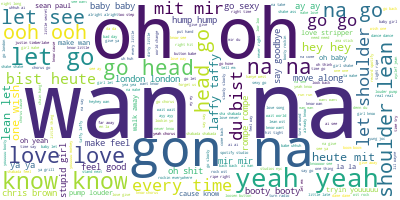

In [556]:
# #Brute force word cloud on all lyrics
# from wordcloud import WordCloud
# long_string = ','.join(df['lyrics_lem'])
# wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# wordcloud.generate(long_string)
# wordcloud.to_image()

In [548]:
#!pip install vaderSentiment

In [24]:
#Just a copy of sentiment analysis code
#sentiment analyser
analyser = SentimentIntensityAnalyzer()

#getting the sentiment scores
chk=[]
for items in df['lyrics_lem']:
    chk.append(analyser.polarity_scores(items))

#into a dataframe
scorels=pd.DataFrame(chk)
df=df.merge(scorels,left_index=True, right_index=True)
df[:2]

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id,neg,neu,pos,compound
0,Beyonce,"[Intro]\nTo the left, to the left\nTo the left...",Hot100,1,Irreplaceable,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro left left left left mmm left left everyt...,intro leave leave leave leave mmm leave leave ...,1,ea3be8af3649dd8aac6639639579a9ce0e67a9e0,0.135,0.774,0.091,-0.2500
1,Rihanna Featuring Jay-Z,"[Intro: JAY-Z]\nUh-huh, uh-huh (Yeah, Rihanna)...",Hot100,2,Umbrella,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro jayz uhhuh uhhuh yeah rihanna uhhuh uhhu...,intro jayz uhhuh uhhuh yeah rihanna uhhuh uhhu...,1,ffe39de71411e3780adfda958c5c18e18dfc4018,0.045,0.848,0.108,0.9618


**2. High, Medium, Low buckets based on ranks**

In [4]:
#Topics from the entire list don't give many insights, so trying to group the songs into buckets based on ranks
df['rank_dec'] = pd.qcut(df['rank'], 3, labels=False)
df_high=df[df['rank_dec']==0]
df_med=df[df['rank_dec']==1]
df_low=df[df['rank_dec']==2]

In [25]:
#Function getting most common words - to be used later
def most_common_words(string_series):
    prune_list=['chorus','know','say','oh','na','hey','wanna','ya','yeah','go','uh','let','see','bist','du','mir','mit','heute','rompe','shabada','record','spotify'\
              ,'studios','la','ha','keep','wan','ya','make','cause','time','ai','way','right','need'\
              ,'te','wt','yo','ta','end','ke','nd','ly','sy','wit','da','em','fi','od','try','ay','nce','mi','ss','sp','things','think',
               'bitch','shit','nigga','niggas','hook','verse','bridge','outro','fuck','li','ll','fe','ne','ght','ca','ki','el']
    string_series_prune=[]
    for items in string_series:
        for word in prune_list:
            if word in items:
                items=items.replace(word,'')
        string_series_prune.append(items)
    count_vectorizer = CountVectorizer(stop_words='english')
    count_data = count_vectorizer.fit_transform(string_series_prune)
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = list(zip(words, total_counts))

    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    print(count_dict)
    plt.figure(2, figsize=(10, 10/1.6180))
    plt.subplot(title='Most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts)
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    #return new_dict
    #long_string=','.join(string_series_prune)
    #wordcloud = WordCloud(background_color="white", max_words=30, contour_width=3, contour_color='steelblue')
    #return wordcloud.generate(long_string).to_image()


**3. Most common words by rank bucket**
- Have removed the common words which occur across groups and also some slang words - subjective, we can play around with this
- Apart from the common top words like 'love','boy,'girl' etc., which feature across buckets, following are the top words across buckets. There seem to be a difference


[('love', 3997.0), ('baby', 2635.0), ('come', 1698.0), ('girl', 1681.0), ('ver', 1567.0), ('ni', 1178.0), ('pre', 1048.0), ('look', 1046.0), ('real', 912.0), ('man', 838.0), ('break', 836.0), ('boy', 768.0), ('heart', 765.0), ('ve', 754.0), ('toni', 707.0), ('moy', 702.0), ('run', 698.0), ('fa', 695.0), ('leave', 693.0), ('turn', 681.0), ('best', 673.0), ('betr', 655.0), ('rock', 645.0), ('bad', 643.0), ('walk', 640.0), ('watch', 632.0), ('world', 628.0), ('st', 623.0), ('lk', 608.0), ('stop', 603.0)]


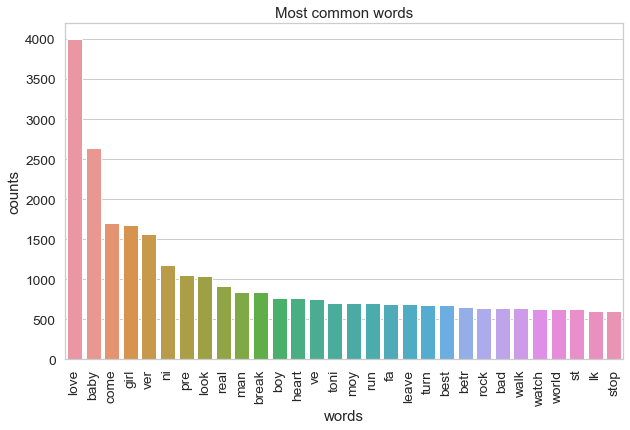

In [26]:
most_common_words(df['lyrics_lem'])

In [6]:
#most_common_words(df_med['lyrics_lem'])

In [7]:
#most_common_words(df_low['lyrics_lem'])

**4. Popular artists by sentiment in each bucket**

In [8]:
# #No difference in the positive vs negative percentages across groups
# print('Percentage of positive/neutral songs by buckets:')
# print('High')
# print(df_high[df_high['compound']>0]['song'].count()/df_high['song'].count())
# print('Med')
# print(df_med[df_med['compound']>0]['song'].count()/df_med['song'].count())
# print('Low')
# print(df_low[df_low['compound']>0]['song'].count()/df_low['song'].count())

# #Artists in high bucket who have highest number of songs under each bucket-sentiment combination
# print('\n')
# print('High Positive:')
# print(df_high[df_high['compound']>0]['artist'].value_counts()[:10])
# print('\n')
# print('High Negative:')
# print(df_high[df_high['compound']<0]['artist'].value_counts()[:10])

# print('\n')
# print('Medium Positive:')
# print(df_med[df_med['compound']>0]['artist'].value_counts()[:10])
# print('\n')
# print('Medium Negative:')
# print(df_med[df_med['compound']<0]['artist'].value_counts()[:10])

# print('\n')
# print('Low Positive:')
# print(df_low[df_low['compound']>0]['artist'].value_counts()[:10])
# print('\n')
# print('Low Negative:')
# print(df_low[df_low['compound']<0]['artist'].value_counts()[:10])



**5. Topic modelling**

**Topics in overall data**

In [56]:
#Removing words from series, I added a few more words to the original list
def top_mod(string_series):
    prune_list=['chorus','know','say','oh','na','hey','wanna','ya','yeah','go','uh','let','see','bist','du','mir','mit','heute','rompe','shabada','record','spotify'\
              ,'studios','la','ha','keep','wan','ya','make','cause','time','ai','way','right','need'\
              ,'te','wt','yo','ta','end','ke','nd','ly','sy','wit','da','em','fi','od','try','ay','nce','mi','ss','sp','things','think',
               'bitch','shit','nigga','niggas','hook','nyc','verse','girl','boy','bridge','baby','outro','fuck','li','ll','fe','ne','ght','ca','ki','el']
    string_series_prune=[]
    for items in string_series:
        for word in prune_list:
            if word in items:
                items=items.replace(word,'')
        string_series_prune.append(items)
    ser = pd.Series( (v for v in string_series_prune) )
    return ser

In [57]:
#Function for topic modeling
def print_topics(model, count_vectorizer, num_words):
    words = count_vectorizer.get_feature_names()
    for topic_num, topic_words in enumerate(model.components_):
        print("\nTopic #%d:" % topic_num)
        print(" ".join([words[i]
                        for i in topic_words.argsort()[:-num_words-1:-1]]))

In [99]:
#parameters
number_topics = 4
number_words = 6

#LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=37)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=37, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [100]:
#count_vectorizer = CountVectorizer(stop_words='english')
#count_data = count_vectorizer.fit_transform(top_mod(df['lyrics_lem']))

print("Topics found via LDA") 
print_topics(lda,count_vectorizer, number_words)

Topics found via LDA

Topic #0:
best walk ich ature uni wild

Topic #1:
love low real moy man bad

Topic #2:
love ba ung eh work watch

Topic #3:
love come ver pre ni look


RandomSeed 43 Topics : club, love, heartbreak, dance
RS 98 Topics : dance, love, money
RS 63 Topics : Money, Dance, Love
Final seed = 17: club, love, dance, misc

In [65]:
#get words
words=count_vectorizer.get_feature_names()
words_df=pd.DataFrame(words)
#word distribution for each topic
word_dist=pd.DataFrame(lda.components_)
word_dist.T.rename(columns={0:'T0',1:'T1',2:'T2',3:'T3'}).head()
#Look at word vs distribution
words_df.merge(word_dist.T,left_index=True, right_index=True)\
.rename(columns={'0_x':'words','0_y':'T0',1:'T1',2:'T2',3:'T3'}).head()

,words,T0,T1,T2,T3
0,aa,16.621645,0.263184,0.250443,19.864728
1,aaa,0.291050,6.115177,3.467653,2.126121
2,aaaa,0.252568,30.243547,0.253882,0.250003
3,aaaaa,0.250006,1.015567,0.260847,0.473580
4,aaaaaaaaaaaa,0.250005,0.250005,10.249982,0.250008


In [66]:
#getting topic weights
weights=lda.transform(count_data)
topic_weights=pd.DataFrame(weights)
topic_weights.head()
#columns = Topic ; rows = words index

,0,1,2,3
0,0.102308,0.893062,0.002386,0.002244
1,0.001461,0.030290,0.966827,0.001422
2,0.996219,0.001265,0.001302,0.001214
3,0.985948,0.004802,0.004754,0.004495
4,0.001373,0.833010,0.164233,0.001384


In [67]:
df=df.merge(topic_weights, left_index=True, right_index=True)

In [68]:
# df=df.sort_values(by=['engagement_score'])
# q1=np.percentile(df['engagement_score'], 25)
# q3=np.percentile(df['engagement_score'], 75)
#average topic scores for low and high engagement quartile
pd.DataFrame({'Topic':['1','2','3','4'],
              'Low Rank':df[df['engagement_high']==0]\
              [df.columns[-number_topics:]].mean(),\
              'High Rank':df[df['engagement_high']==1][df.columns[-number_topics:]].mean()})
#rows = topic name

,Topic,Low Rank,High Rank
0,1,0.307297,0.328746
1,2,0.256928,0.204419
2,3,0.380110,0.374007
3,4,0.055666,0.092828


In [72]:
df

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,engagement_high,song_id,neg,neu,pos,compound,0,1,2,3
0,Beyonce,"[Intro]\nTo the left, to the left\nTo the left...",Hot100,1,Irreplaceable,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro left left left left mmm left left everyt...,intro leave leave leave leave mmm leave leave ...,1,ea3be8af3649dd8aac6639639579a9ce0e67a9e0,0.135,0.774,0.091,-0.2500,0.102308,0.893062,0.002386,0.002244
1,Rihanna Featuring Jay-Z,"[Intro: JAY-Z]\nUh-huh, uh-huh (Yeah, Rihanna)...",Hot100,2,Umbrella,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro jayz uhhuh uhhuh yeah rihanna uhhuh uhhu...,intro jayz uhhuh uhhuh yeah rihanna uhhuh uhhu...,1,ffe39de71411e3780adfda958c5c18e18dfc4018,0.045,0.848,0.108,0.9618,0.001461,0.030290,0.966827,0.001422
2,Gwen Stefani Featuring Akon,"[Intro: Akon]\nKonvict, Konvict, Konvict\nWoo-...",Hot100,3,The Sweet Escape,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro akon konvict konvict konvict woohoo yeeh...,intro akon konvict konvict konvict woohoo yeeh...,1,f7a0bd0f7d420597d7a617aecfd0c61d327d1f13,0.082,0.433,0.485,0.9995,0.996219,0.001265,0.001302,0.001214
3,Fergie,1) When I was born (1997)\nTu Angelito soy y.-...,Hot100,4,Big Girls Don't Cry,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,born tu angelito soy chino nacho parents us st...,bear tu angelito soy chino nacho parent us sto...,1,160a31bde9734a03c9fd908b38ccc99842beba32,0.078,0.720,0.202,0.9295,0.985948,0.004802,0.004754,0.004495
4,T-Pain Featuring Yung Joc,[Intro: T-Pain & Yung Joc]\n(Shawty snap)\nYea...,Hot100,5,Buy U A Drank (Shawty Snappin'),https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro tpain yung joc shawty snap yeah tpain da...,intro tpain yung joc shawty snap yeah tpain da...,1,8692900552f2fb05ef2e94e41fa10cac9df0c88b,0.027,0.804,0.170,0.9927,0.001373,0.833010,0.164233,0.001384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,Luke Combs,"[Verse 1]\nAre you sitting at home, all alone,...",Hot100,96,One Number Away,https://www.billboard.com/charts/year-end/2018...,hot-100-songs,2018,sitting home alone trying fall asleep staring ...,sit home alone try fall asleep star hole phone...,0,23e53847b13d1084d821ab87aecd530497e2b6cb,0.159,0.683,0.158,-0.6522,0.450785,0.036969,0.509559,0.002687
1190,Rae Sremmurd & Juicy J,Logic & Marshmello - Everyday\nXXXTENTACION - ...,Hot100,97,Powerglide,https://www.billboard.com/charts/year-end/2018...,hot-100-songs,2018,logic marshmello everyday xxxtentacion sad nic...,logic marshmello everyday xxxtentacion sad nic...,0,5a18537b9754799b6633e886e5b9b1b677550420,0.131,0.680,0.189,0.9701,0.741256,0.176321,0.001320,0.081103
1191,Dua Lipa,[Verse 1]\nYou call me all friendly\nTellin' m...,Hot100,98,IDGAF,https://www.billboard.com/charts/year-end/2018...,hot-100-songs,2018,call friendly tellin much miss funny guess hea...,call friendly tellin much miss funny guess hea...,0,69159fa4d1b54218f910eb24bbd7e588c0a46f24,0.221,0.518,0.261,0.9360,0.216005,0.250052,0.530525,0.003418
1192,J Balvin & Willy William Featuring Beyonce,"[Letra de ""Mi Gente"" (Remix) ft. Beyoncé]\n\n[...",Hot100,99,Mi Gente,https://www.billboard.com/charts/year-end/2018...,hot-100-songs,2018,letra de mi gente remix ft beyoncé verso j bal...,letra de mi gente remix ft beyoncé verso j bal...,0,9cebc3ae6a1be2287dfca1f358edc4a8512d1159,0.007,0.787,0.206,0.9967,0.000984,0.000983,0.977625,0.020408


**Clustering**

In [69]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [101]:
X = df.iloc[:,[12,13,14,16,17,18,19]]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

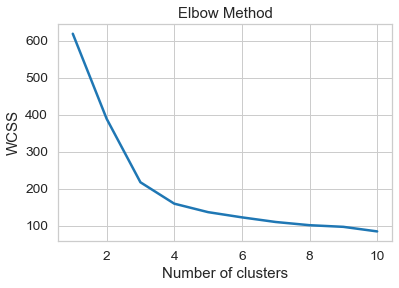

In [102]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=3, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=3, random_state=0)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=3, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [165]:
# # Plotting the cluster centers and the data points on a 2D plane
# plt.scatter(X[:, 0], X[:, -1])
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
# plt.title('Data points and cluster centroids')
# plt.show()

In [107]:
df['cluster'] = pd.Series(kmeans.labels_)

In [108]:
df['cluster'].value_counts()

2    453
1    372
0    369
Name: cluster, dtype: int64

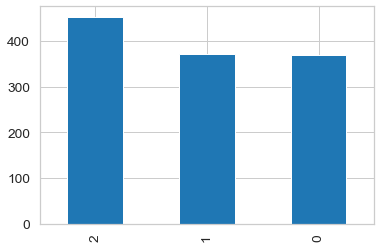

In [109]:
df['cluster'].value_counts().plot(kind='bar')

0.08376843591508493
0.647335767157459
0.10548087009060275
0.16341492683685338


,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,...,neg,neu,pos,compound,0,1,2,3,cluster,ID
116,Rihanna,[Intro: Rihanna]\nPlease don't stop the music ...,Hot100,17,Don't Stop The Music,https://www.billboard.com/charts/year-end/2008...,hot-100-songs,2008,intro rihanna please stop music music music mu...,intro rihanna please stop music music music mu...,...,0.150,0.557,0.293,0.9961,0.001155,0.996569,0.001149,0.001127,0,116
221,Drake,"[Intro]\nYou know, a lot of girls be\nThinkin'...",Hot100,22,Best I Ever Had,https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,intro know lot girls thinkin songs get confuse...,intro know lot girls thinkin songs get confuse...,...,0.039,0.605,0.355,0.9995,0.001430,0.404377,0.484645,0.109548,0,221
299,Ke$ha,[Verse 1]\nWake up in the morning feeling like...,Hot100,1,TiK ToK,https://www.billboard.com/charts/year-end/2010...,hot-100-songs,2010,wake morning feeling like nick jonas oh gosh g...,wake morning feel like nick jonas oh gosh get ...,...,0.084,0.878,0.038,-0.9522,0.001149,0.625513,0.372212,0.001127,0,299
356,Ke$ha,[Hook]\nI don't need you or your brand new Ben...,Hot100,59,Take It Off,https://www.billboard.com/charts/year-end/2010...,hot-100-songs,2010,hook need brand new benz bougie friends need l...,hook need brand new benz bougie friends need l...,...,0.143,0.572,0.286,0.9980,0.081748,0.899634,0.017735,0.000883,0,356
357,Drake,[Produced by Boi-1da and Al-Khaaliq]\n\n[Intro...,Hot100,60,Over,https://www.billboard.com/charts/year-end/2010...,hot-100-songs,2010,produced boida alkhaaliq intro young money cho...,produce boida alkhaaliq intro young money chor...,...,0.141,0.640,0.219,0.9670,0.411007,0.585471,0.001783,0.001739,0,357
408,Rihanna,"[Intro: Ester Dean]\nNa-na-na, c'mon\nNa-na-na...",Hot100,12,S&M,https://www.billboard.com/charts/year-end/2011...,hot-100-songs,2011,intro ester dean nanana c amon nananana c amon...,intro ester dean nanana c amon nananana c amon...,...,0.063,0.472,0.465,0.9994,0.001625,0.995141,0.001649,0.001585,0,408
428,Ke$ha,[Produced by DJA]\n\n[Verse 1: Rittz]\nShit my...,Hot100,33,Blow,https://www.billboard.com/charts/year-end/2011...,hot-100-songs,2011,produced dja rittz shit flow aggressive told i...,produce dja rittz shit flow aggressive tell im...,...,0.321,0.613,0.067,-0.9986,0.001423,0.590757,0.001432,0.406389,0,428
480,Drake,"[Produced by Boi-1da and Noah ""40"" Shebib]\n\n...",Hot100,85,Headlines,https://www.billboard.com/charts/year-end/2011...,hot-100-songs,2011,produced boida noah shebib might strung compli...,produce boida noah shebib might string complim...,...,0.138,0.660,0.202,0.9423,0.040074,0.720822,0.236774,0.002329,0,480
580,Ke$ha,"[Hook]\nI'm gonna live my life slow, at a comf...",Hot100,85,Die Young,https://www.billboard.com/charts/year-end/2012...,hot-100-songs,2012,hook gonna live life slow comfortable pace cal...,hook gon na live life slow comfortable pace ca...,...,0.138,0.608,0.254,0.9593,0.050969,0.943201,0.002950,0.002880,0,580
589,Rihanna,[Intro]\nShine bright like a diamond\nShine br...,Hot100,94,Diamonds,https://www.billboard.com/charts/year-end/2012...,hot-100-songs,2012,intro shine bright like diamond shine bright l...,intro shine bright like diamond shine bright l...,...,0.011,0.291,0.699,0.9998,0.001695,0.994896,0.001660,0.001749,0,589


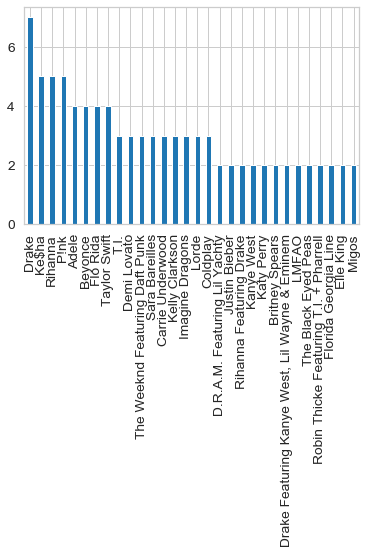

In [153]:
clus0=df[df['cluster']==0]
clus0['artist'].value_counts()[:30].plot(kind='bar')
for i in range(4):
    print (clus0[i].mean())

clus0[clus0['artist'].isin(['Drake','Ke$ha','Rihanna'])]

0.8378047268154685
0.0645064898131016
0.08310525844898169
0.014583524922448176


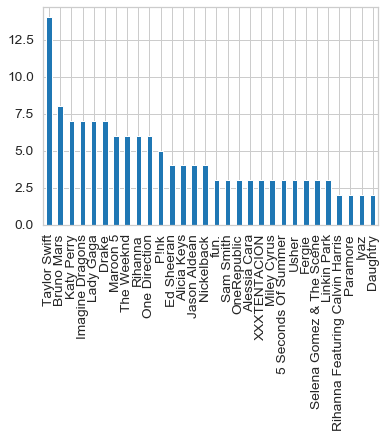

In [159]:
clus1=df[df['cluster']==1]
clus1['artist'].value_counts()[:30].plot(kind='bar')
for i in range(4):
    print (clus1[i].mean())
    
#clus1[clus1['artist'].isin(['Taylor Swift','Bruno Mars','Katy Perry'])]    

0.06783840654376033
0.062385465153695384
0.8436967934888481
0.026079334813696144


,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,...,neg,neu,pos,compound,0,1,2,3,cluster,ID
130,Miley Cyrus,[Verse 1]\nI got my sights set on you and I'm ...,Hot100,31,See You Again,https://www.billboard.com/charts/year-end/2008...,hot-100-songs,2008,got sights set ready aim heart never tamed kne...,get sight set ready aim heart never tame know ...,...,0.102,0.699,0.199,0.9612,0.162015,0.002840,0.832341,0.002805,2,130
220,Miley Cyrus,[Verse 1]\nI can almost see it\nThat dream I'm...,Hot100,21,The Climb,https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,almost see dream dreaming voice inside head sa...,almost see dream dream voice inside head say n...,...,0.126,0.756,0.118,-0.1358,0.004540,0.004180,0.987047,0.004234,2,220
612,Miley Cyrus,"[Intro]\nIt's our party, we can do what we wan...",Hot100,17,We Can't Stop,https://www.billboard.com/charts/year-end/2013...,hot-100-songs,2013,intro party want party say want party love wan...,intro party want party say want party love wan...,...,0.229,0.361,0.410,0.9941,0.187905,0.212913,0.596654,0.002527,2,612
613,Miley Cyrus,"[Verse 1]\nWe clawed, we chained, our hearts i...",Hot100,18,Wrecking Ball,https://www.billboard.com/charts/year-end/2013...,hot-100-songs,2013,clawed chained hearts vain jumped never asking...,claw chain hearts vain jump never ask kiss fel...,...,0.233,0.462,0.305,0.8537,0.002416,0.002381,0.992907,0.002296,2,613
739,Miley Cyrus,"[Verse 1]\nWe clawed, we chained, our hearts i...",Hot100,44,Wrecking Ball,https://www.billboard.com/charts/year-end/2014...,hot-100-songs,2014,clawed chained hearts vain jumped never asking...,claw chain hearts vain jump never ask kiss fel...,...,0.233,0.462,0.305,0.8537,0.002416,0.002381,0.992907,0.002296,2,739
747,Ed Sheeran,[Verse 1]\nI met this girl late last year\nShe...,Hot100,52,Don't,https://www.billboard.com/charts/year-end/2014...,hot-100-songs,2014,met girl late last year said worry disappear t...,meet girl late last year say worry disappear t...,...,0.146,0.592,0.262,0.9907,0.001983,0.001963,0.989983,0.006071,2,747
751,Ed Sheeran,[Verse 1]\nIt's late in the evening\nGlass on ...,Hot100,56,Sing,https://www.billboard.com/charts/year-end/2014...,hot-100-songs,2014,late evening glass side sat night ignorin ever...,late even glass side sit night ignorin everybo...,...,0.032,0.705,0.263,0.9956,0.467414,0.002306,0.528109,0.002171,2,751
795,Miley Cyrus,"[Verse 1]\nBaby, baby, yeah, are you listening...",Hot100,100,Adore You,https://www.billboard.com/charts/year-end/2014...,hot-100-songs,2014,baby baby yeah listening wondering life starte...,baby baby yeah listen wonder life start live o...,...,0.040,0.437,0.522,0.9973,0.006898,0.006753,0.979790,0.006560,2,795
829,Ed Sheeran,"[Verse 1]\nLoving can hurt, loving can hurt so...",Hot100,34,Photograph,https://www.billboard.com/charts/year-end/2015...,hot-100-songs,2015,loving hurt loving hurt sometimes thing know g...,love hurt love hurt sometimes thing know get h...,...,0.122,0.639,0.239,0.9781,0.002472,0.002399,0.992813,0.002316,2,829
886,Ed Sheeran,[Verse 1]\nI met this girl late last year\nShe...,Hot100,92,Don't,https://www.billboard.com/charts/year-end/2015...,hot-100-songs,2015,met girl late last year said worry disappear t...,meet girl late last year say worry disappear t...,...,0.146,0.592,0.262,0.9907,0.001983,0.001963,0.989983,0.006071,2,886


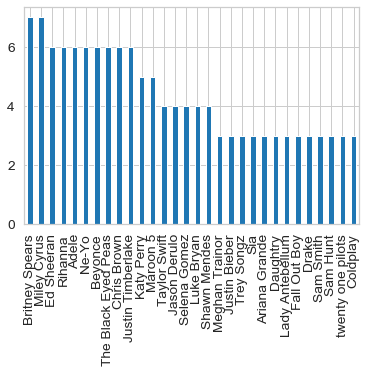

In [157]:
clus2=df[df['cluster']==2]
clus2['artist'].value_counts()[:30].plot(kind='bar')
for i in range(4):
    print (clus2[i].mean())
    
clus2[clus2['artist'].isin(['Britney','Miley Cyrus','Ed Sheeran'])]

In [158]:
clus1=df[df['cluster']==3]
clus1['artist'].value_counts()[:30].plot(kind='bar')

#clus0[clus0['artist'].isin(['Drake','Ke$hna','Rihanna'])]

TypeError: no numeric data to plot

In [81]:
for i in range(4):    
    print('Cluster:',i)
    print(df[df['cluster']==i]['artist'].value_counts()[:5])

Cluster: 0
Drake              5
Britney Spears     4
XXXTENTACION       4
Imagine Dragons    4
Adele              3
Name: artist, dtype: int64
Cluster: 1
Ed Sheeran     6
Beyonce        6
Miley Cyrus    6
Rihanna        6
Adele          5
Name: artist, dtype: int64
Cluster: 2
Taylor Swift    13
Bruno Mars       8
Katy Perry       7
Lady Gaga        7
The Weeknd       6
Name: artist, dtype: int64
Cluster: 3
Drake      5
Rihanna    4
P!nk       3
Lorde      3
Ke$ha      3
Name: artist, dtype: int64


In [82]:
for i in range(4):    
    print('Cluster:',i)
    print(df[df['cluster']==i]['engagement_high'].value_counts())

Cluster: 0
0    205
1     76
Name: engagement_high, dtype: int64
Cluster: 1
0    271
1     86
Name: engagement_high, dtype: int64
Cluster: 2
0    241
1     75
Name: engagement_high, dtype: int64
Cluster: 3
0    179
1     61
Name: engagement_high, dtype: int64


**Recommending**

In [83]:
df['ID'] = df['artist'].index

In [250]:
#playing with df because get random missing rows/indices

#len(df) 2961
#df.iloc[2615:2623,]
#df.iloc[pd.np.r_[2049:2052, 2056:2060]]
#for i, r in df.iloc[1:].iterrows():
#for index, value in df.iloc[pd.np.r_[0:2052, 2054:2961]].iterrows():
#    print(value['ID'])

In [84]:
#define X including sentiment and topic %s only
X = df.iloc[0:1194,[12,13,14,15,16,17,18,19]]
len(X)

1194

In [85]:
#find cosine similarity and most similar items
cosine_similarities = cosine_similarity(X)
results = {}
for index,value in df.iloc[0:2052,].iterrows(): #iterates through all the rows
    similar_indices = cosine_similarities[index].argsort()[:-6:-1]
    similar_items = [(cosine_similarities[index][i], df['ID'][i]) for i in similar_indices]
    results[value['ID']] = similar_items[1:]

In [86]:
def artist(id):
    return df.loc[df['ID'] == id]['artist'].tolist()[0]
def song(id):
    return df.loc[df['ID'] == id]['song'].tolist()[0]
def recommend(id, num):
    if (num == 0):
        print("Unable to recommend any songs as you have not chosen the number of songs to be recommended")    
    else :
        print("Recommending " + str(num) + " similar songs to  " + song(id) + " by " + artist(id))
        
    recs = results[id][:num]
    for rec in recs:
        print("You may also like to listen to: " + song(rec[1]) + " by " + artist(rec[1]) + " (score:" + str(rec[0]) + ")")


In [87]:
#recommend(98,3)
#recommend(2000,3)
#recommend(2050,3)
#recommend(1975,3)
#recommend(12,5)
recommend(576,5) #bad recommendation

Recommending 5 similar songs to  50 Ways To Say Goodbye by Train
You may also like to listen to: Scars To Your Beautiful by Alessia Cara (score:0.9999510650677569)
You may also like to listen to: Like I'm Gonna Lose You by Meghan Trainor Featuring John Legend (score:0.9999299674785478)
You may also like to listen to: Like I'm Gonna Lose You by Meghan Trainor Featuring John Legend (score:0.9999299674785478)
You may also like to listen to: Fake Love by Drake (score:0.999819263368807)


In [90]:
recommend(975,5)

Recommending 5 similar songs to  On My Mind by Ellie Goulding
You may also like to listen to: Meet Me Halfway by The Black Eyed Peas (score:0.997399384985065)
You may also like to listen to: It's Not Over by Daughtry (score:0.9568756197109752)
You may also like to listen to: Cold Water by Major Lazer Featuring Justin Bieber & MO (score:0.926480004953536)
You may also like to listen to: Drunk On A Plane by Dierks Bentley (score:0.9234739769819423)


In [92]:
recommend(32,3)

Recommending 3 similar songs to  Bartender by T-Pain Featuring Akon
You may also like to listen to: Best I Ever Had by Drake (score:0.9964071082555501)
You may also like to listen to: Her Diamonds by Rob Thomas (score:0.9948316020440947)
You may also like to listen to: This Is How We Roll by Florida Georgia Line Featuring Luke Bryan (score:0.9926791493139698)


In [98]:
recommend(0,5)

Recommending 5 similar songs to  Irreplaceable by Beyonce
You may also like to listen to: iSpy by KYLE Featuring Lil Yachty (score:0.9853023522148664)
You may also like to listen to: Live Your Life by T.I. Featuring Rihanna (score:0.9758327506952668)
You may also like to listen to: Live Your Life by T.I. Featuring Rihanna (score:0.9758327506952668)
You may also like to listen to: Down by Marian Hill (score:0.9757110266994138)


In [94]:
recommend(857,4)

Recommending 4 similar songs to  Girl Crush by Little Big Town
You may also like to listen to: Money Maker by Ludacris Featuring Pharrell (score:0.9932233490925559)
You may also like to listen to: Drunk On A Plane by Dierks Bentley (score:0.9923450970657469)
You may also like to listen to: God's Plan by Drake (score:0.9877308577537783)
You may also like to listen to: What Goes Around...Comes Around by Justin Timberlake (score:0.9834372318641236)


In [285]:
df.iloc[1887]

artist                                                      Coldplay
lyrics             [Verse 1: Chris Martin]\nI used to rule the wo...
name                                                          Hot100
rank                                                              13
song                                                    Viva La Vida
url                https://www.billboard.com/charts/year-end/2008...
urltag                                                 hot-100-songs
year                                                            2008
lyrics_clean       chris martin used rule world seas would rise g...
lyrics_lem         chris martin use rule world seas would rise gi...
engagement_high                                                    1
song_id                     fb1f0903774aed4fa8c88a22bbcad209ee4d11a2
neg                                                            0.091
neu                                                             0.87
pos                               

In [95]:
df[df['artist']=='Beyonce']

,artist,lyrics,name,rank,song,url,urltag,year,lyrics_clean,lyrics_lem,...,neg,neu,pos,compound,0,1,2,3,cluster,ID
0,Beyonce,"[Intro]\nTo the left, to the left\nTo the left...",Hot100,1,Irreplaceable,https://www.billboard.com/charts/year-end/2007...,hot-100-songs,2007,intro left left left left mmm left left everyt...,intro leave leave leave leave mmm leave leave ...,...,0.135,0.774,0.091,-0.2500,0.102308,0.893062,0.002386,0.002244,0,0
207,Beyonce,"[Produced by Beyoncé, The-Dream & Tricky Stewa...",Hot100,8,Single Ladies (Put A Ring On It),https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,produced beyoncé thedream tricky stewart intro...,produce beyoncé thedream tricky stewart intro ...,...,0.089,0.708,0.203,0.9890,0.001752,0.001767,0.994761,0.001720,1,207
223,Beyonce,[Verse 1]\nRemember those walls I built?\nWell...,Hot100,24,Halo,https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,remember walls built well baby tumblin even pu...,remember wall build well baby tumblin even put...,...,0.045,0.804,0.152,0.9710,0.001981,0.994199,0.001949,0.001872,3,223
247,Beyonce,[Verse 1]\nIf I were a boy\nEven just for a da...,Hot100,48,If I Were A Boy,https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,boy even day would roll bed morning throw want...,boy even day would roll bed morning throw want...,...,0.188,0.539,0.273,0.9103,0.004387,0.297299,0.694169,0.004144,1,247
265,Beyonce,[Intro]\n(Turn the lights on)\n\n[Verse 1]\nEv...,Hot100,66,Sweet Dreams,https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,intro turn lights every night rush bed hopes m...,intro turn light every night rush bed hop mayb...,...,0.044,0.488,0.468,0.9992,0.284377,0.001956,0.711749,0.001917,1,265
280,Beyonce,"[Chorus]\nI'm a-a diva (hey), I'm a, I'm a-a d...",Hot100,82,Diva,https://www.billboard.com/charts/year-end/2009...,hot-100-songs,2009,chorus aa diva hey aa diva hey aa diva hey aa ...,chorus aa diva hey aa diva hey aa diva hey aa ...,...,0.036,0.884,0.080,0.8934,0.995463,0.001516,0.001472,0.001549,2,280
383,Beyonce,[Intro]\n(Turn the lights on)\n\n[Verse 1]\nEv...,Hot100,86,Sweet Dreams,https://www.billboard.com/charts/year-end/2010...,hot-100-songs,2010,intro turn lights every night rush bed hopes m...,intro turn light every night rush bed hop mayb...,...,0.044,0.488,0.468,0.9992,0.284377,0.001956,0.711749,0.001917,1,383
481,Beyonce,"[Intro]\nWhat goes around, comes back around (...",Hot100,86,Best Thing I Never Had,https://www.billboard.com/charts/year-end/2011...,hot-100-songs,2011,intro goes around comes back around hey baby g...,intro go around come back around hey baby go a...,...,0.085,0.532,0.383,0.9984,0.001896,0.282401,0.713843,0.001861,1,481
790,Beyonce,[Part 1: Yoncé]\n\n[Intro]\nLet me hear you sa...,Hot100,95,Partition,https://www.billboard.com/charts/year-end/2014...,hot-100-songs,2014,part yoncé intro let hear say hey ms carter he...,part yoncé intro let hear say hey ms carter he...,...,0.047,0.691,0.262,0.9983,0.001203,0.001235,0.996387,0.001175,1,790
855,Beyonce,"[Pre-Chorus]\nShoulders sideways, smack it, sm...",Hot100,61,7/11,https://www.billboard.com/charts/year-end/2015...,hot-100-songs,2015,prechorus shoulders sideways smack smack air l...,prechorus shoulder sideways smack smack air le...,...,0.034,0.643,0.323,0.9989,0.058852,0.213432,0.001471,0.726245,3,855
